1. Model SubClassing(7강)
2. reset_states(8강)
3. Validation, Test, tf.function Decorator(9강)

# 7강

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# keras.layer.Layers 
# keras.Model

# Custom Layer!!! 내가 하고 싶었던 거야

# 1. Sequential API -> 간단하게

# 2. Functional API -> 거의 잘 안씀 -> 
##  x = Dense(5, activation = 'relu')(Inputs)
##  x = Dense(10, activation = 'relu' )(x)
##  outputs = Dense(2, activation = 'sigmoid' )(x)
##  model = Model(inputs= inputs, outputs= outputs)

# 3. Model SubClassing
## 정말 필요할 때만 쓰자. CustomLayer가 필요한 경우
## layer.Layers
## 여러 가지 방법의 혼합이 가능함 Model Subcalssing, Layer Subclassing

import tensorflow as tf

from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Layer, Dense, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import SparseCategoricalAccuracy

#  class CustomLayer(Layer):
#    def __init__(self):
#      super(CustomLayer1, self).__init__()
#  
#    def call(self, x):

# 8강

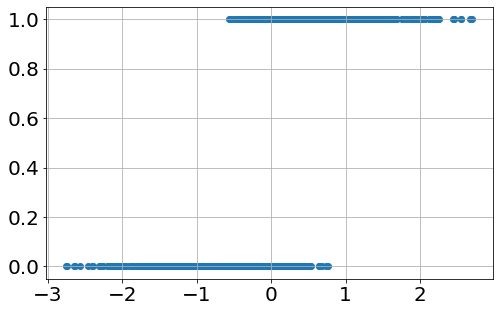

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

n_train = 1000

train_x = np.random.normal(0, 1, size = (n_train, 1))
train_x_noise = train_x + 0.4*np.random.normal(0, 1, size = (n_train, 1))

train_y  = (train_x_noise > 0 ).astype(np.int32)

fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(train_x, train_y)
ax.tick_params(labelsize = 20)
ax.grid()

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

In [20]:
model = Sequential()
model.add(Dense(units = 2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

for epoch in range(EPOCHS):
  for x, y in train_ds:
    with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_acc(y, predictions)

  print(colored('Epoch: ', 'red', 'on_white'), epoch +1)
  template ='Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n'
  print(template.format(train_loss.result(),
                        train_acc.result()*100))
  
  train_loss.reset_states()
  train_acc.reset_states()

Epoch:  1
Train Loss: 0.2913	 Train Accuracy: 85.70%

Epoch:  2
Train Loss: 0.2807	 Train Accuracy: 86.40%

Epoch:  3
Train Loss: 0.2775	 Train Accuracy: 86.80%

Epoch:  4
Train Loss: 0.2792	 Train Accuracy: 87.20%

Epoch:  5
Train Loss: 0.2781	 Train Accuracy: 86.50%

Epoch:  6
Train Loss: 0.2807	 Train Accuracy: 85.90%

Epoch:  7
Train Loss: 0.2840	 Train Accuracy: 86.60%

Epoch:  8
Train Loss: 0.2805	 Train Accuracy: 87.60%

Epoch:  9
Train Loss: 0.2815	 Train Accuracy: 86.50%

Epoch:  10
Train Loss: 0.2802	 Train Accuracy: 86.90%



In [19]:
train_loss = Mean()

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
  train_loss(t)
  print(train_loss.result()) 

print('\n')
t2 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t2:
  train_loss(t)
  print(train_loss.result()) 

# 누적이 되면서 loss 구해짐
# 반드시 각 epoch마다 loss.rest_states()를 해주어야함(모든 epoch마다 누적하고 싶지 않다면)
# 우리는 epoch별로 loss와 accuracy를 구하고 싶기 떄문

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(3.142857, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.1, shape=(), dtype=float32)
tf.Tensor(3.2727273, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


# 9강
- tf.function : 최적화(?)
- tf.function은 즉시 실행 모드 보다 빠릅니다. 특히 그래프에 작은 연산이 많을 때 그렇습니다. 하지만 (합성곱처럼) 계산량이 많은 연산 몇 개로 이루어진 그래프는 속도 향상이 크지 않습니다.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from termcolor import colored

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

n_train, n_validation, n_test = 1000, 300, 300

train_x = np.random.normal(0, 1, size = (n_train, 1))
train_x_noise = train_x + 0.4*np.random.normal(0, 1, size = (n_train, 1))
train_y  = (train_x_noise > 0 ).astype(np.int32)

validation_x = np.random.normal(0, 1, size = (n_validation, 1))
validation_x_noise = validation_x + 0.4*np.random.normal(0, 1, size = (n_validation, 1))
validation_y  = (validation_x_noise > 0 ).astype(np.int32)

test_x = np.random.normal(0, 1, size = (n_test, 1))
test_x_noise = test_x + 0.4*np.random.normal(0, 1, size = (n_test, 1))
test_y  = (test_x_noise > 0 ).astype(np.int32)

# fig, ax = plt.subplots(figsize = (8,5))
# ax.scatter(train_x, train_y)
# ax.tick_params(labelsize = 20)
# ax.grid()

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(n_train).batch(8)

validation_ds = tf.data.Dataset.from_tensor_slices((validation_x, validation_y))
validation_ds = validation_ds.batch(n_validation)

test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_ds = test_ds.batch(n_test)

Epoch:  1
Train Loss: 0.2949	 Train Accuracy: 87.20%
 	 Validation Loss: 0.3409	 Validation Accuracy: 84.33%

Epoch:  2
Train Loss: 0.2643	 Train Accuracy: 88.50%
 	 Validation Loss: 0.3387	 Validation Accuracy: 83.67%

Epoch:  3
Train Loss: 0.2681	 Train Accuracy: 87.70%
 	 Validation Loss: 0.3550	 Validation Accuracy: 85.67%

Epoch:  4
Train Loss: 0.2683	 Train Accuracy: 88.00%
 	 Validation Loss: 0.3629	 Validation Accuracy: 83.33%

Epoch:  5
Train Loss: 0.2684	 Train Accuracy: 88.20%
 	 Validation Loss: 0.3385	 Validation Accuracy: 84.33%

Epoch:  6
Train Loss: 0.2679	 Train Accuracy: 87.90%
 	 Validation Loss: 0.3397	 Validation Accuracy: 84.33%

Epoch:  7
Train Loss: 0.2674	 Train Accuracy: 88.50%
 	 Validation Loss: 0.3428	 Validation Accuracy: 83.67%

Epoch:  8
Train Loss: 0.2652	 Train Accuracy: 88.10%
 	 Validation Loss: 0.3606	 Validation Accuracy: 83.33%

Epoch:  9
Train Loss: 0.2683	 Train Accuracy: 88.00%
 	 Validation Loss: 0.3418	 Validation Accuracy: 83.67%

Epoch:  10

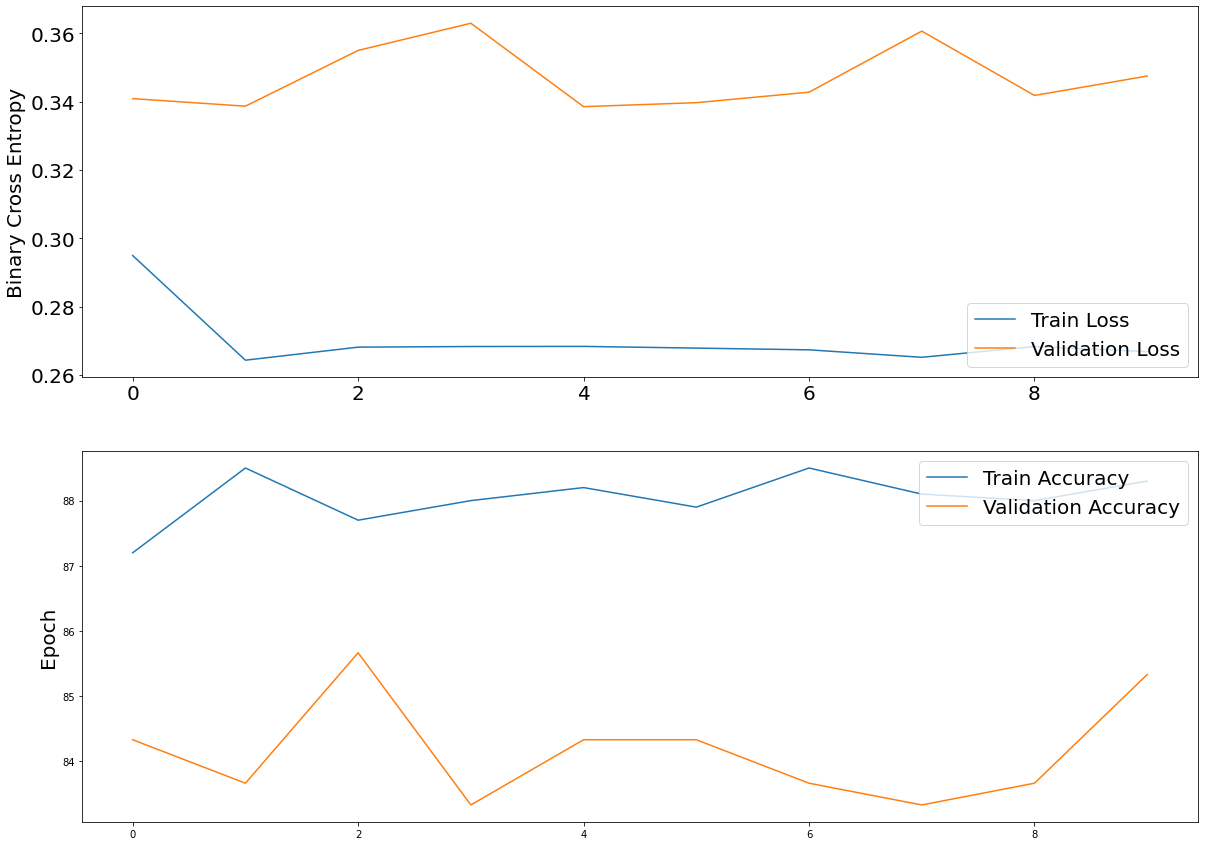

In [46]:
model = Sequential()
model.add(Dense(units = 2, activation='softmax'))

loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate=1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

validation_loss = Mean()
validation_acc = SparseCategoricalAccuracy()

test_loss = Mean()
test_acc = SparseCategoricalAccuracy()

EPOCHS = 10

@tf.function
def train_step(x, y):
  global model, loss_object
  global train_loss, train_acc

  with tf.GradientTape() as tape:
      predictions = model(x)
      loss = loss_object(y, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_acc(y, predictions)

@tf.function
def validation_step():
  global validation_ds, model, loss_object
  global validation_loss, validation_acc

  for x, y in validation_ds:
    predictions = model(x)
    loss = loss_object(y, predictions)

    validation_loss(loss)
    validation_acc(y, predictions)

def train_report():
  global epoch
  global train_loss, train_loss
  global vaidation_loss, validation_acc

  print(colored('Epoch: ', 'red', 'on_white'), epoch +1)
  template ='Train Loss: {:.4f}\t Train Accuracy: {:.2f}%\n \t Validation Loss: {:.4f}\t Validation Accuracy: {:.2f}%\n'
  print(template.format(train_loss.result(), train_acc.result()*100,
                        validation_loss.result(), validation_acc.result()*100))
  
def metric_resetter():
  global train_loss, train_acc
  global vaidation_loss, validation_acc

  train_losses.append(train_loss.result())
  validation_losses.append(validation_loss.result())
  train_accs.append(train_acc.result()*100)
  validation_accs.append(validation_acc.result()*100)

  train_loss.reset_states()
  train_acc.reset_states()
  validation_loss.reset_states()
  validation_acc.reset_states()

def final_result_visualiation():
  global train_accs, train_losses
  global vaidation_losses, validation_accs

  fig, axes = plt.subplots(2, 1, figsize = (20, 15))  
  axes[0].plot(train_losses, label = 'Train Loss')
  axes[0].plot(validation_losses, label = 'Validation Loss')

  axes[1].plot(train_accs, label = 'Train Accuracy')
  axes[1].plot(validation_accs, label = 'Validation Accuracy')

  axes[0].tick_params(labelsize = 20)
  axes[0].tick_params(labelsize = 20)
  
  axes[0].set_ylabel('Binary Cross Entropy', fontsize= 20)
  axes[1].set_ylabel('Accuracy', fontsize= 20)
  axes[1].set_ylabel('Epoch', fontsize= 20)

  axes[0].legend(loc = 'lower right', fontsize= 20)
  axes[1].legend(loc = 'upper right', fontsize= 20)


train_losses, validation_losses = [], []
train_accs, validation_accs = [], []
for epoch in range(EPOCHS):
  for x, y in train_ds:
    train_step(x,y)
  
  validation_step()
  train_report()
  metric_resetter()

for x, y in test_ds:
    predictions = model(x)
    loss = loss_object(y, predictions)

    test_loss(loss)
    test_acc(y, predictions)

final_result_visualiation()
print(colored('Final Result: ', 'cyan', 'on_white'))
template ='Test Loss: {:.4f}\t Test Accuracy: {:.2f}%\n'
print(template.format(test_loss.result(), test_acc.result()*100))